In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# A/B Testing: Comparing Two Samples

In [2]:
# Run this cell
births = Table.read_table('data/baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [3]:
# Assign to `smoking_and_birthweight` only the columns `Maternal Smoker` and `Birth Weight`
smoking_and_birthweight = ...
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


In [4]:
# Using the table `smoking_and_birthweight`, determine the number of mothers that smoked (True)
# and mothers that did not smoke (False)
... 

Maternal Smoker,count
False,715
True,459


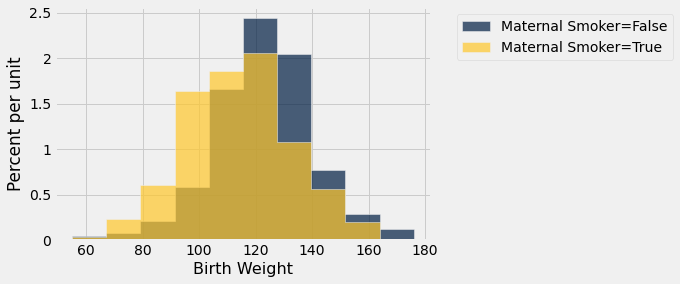

In [5]:
# Run this cell to show a visualization of the percent of mothers that smoked
# and did not smoke on the same histogram
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [6]:
# Sort the original table `births` by `Maternal Height` in ascending order
# In your opinion, does this provide any useful information?
...

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
146,263,39,53,110,True
141,281,29,54,156,True
105,270,22,56,93,False
99,249,31,57,98,True
146,280,26,58,106,False
107,244,20,58,97,False
108,268,22,58,112,True
131,308,30,58,150,True
116,286,22,58,105,True
107,268,37,58,112,True


## Test Statistic


In [7]:
# Use the table `smoking_and_birthweight`, determine
# the avearge birth weight for each group

means_table = ...
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [8]:
# Use the table `means_table` to calculate the observed test statistic
# You can create an intermediate step by assigning to `means` the value of the 
# column of interest (ie the Birth weight average#
# Recall, the test statistic for this example is the difference between the 
# mean baby birth weight of the moms that smoked and the mean baby birth weight of
# the moms that did not smoke.  Assign this value to `observed_difference

means = ...
observed_difference = ...
observed_difference

-9.266142572024918

In [9]:
# Below is a function that could calculate the statistic
# but is flexible enough to work on any table when you
# specify the column label that contains numerical values
# that you want to average, and the grouping label
# Look over the format of the function to make sure
# you completely understand what is going on

def difference_of_means(table, label, group_label):

    # create table with only the two relevant columns
    reduced = table.select(label, group_label)  
    
    # create table containing group means
    means_table = reduced.group(group_label, np.average)
    
    # pull just the column/array with the group means
    # use .column(1) since predicted the label is hard
    means = means_table.column(1)
    
    # return the difference between the two elements
    return means.item(1) - means.item(0)

In [10]:
# Use the function `difference_of_means` to calculate the observed statistic
# Hint: look at the function above and observe what is being `taking in` when the 
# function is used
# Hint #2: the label used is `Birth Weight`

...

-9.266142572024918

In [ ]:
# Since the function provides flexibility, look at a few other variables
# Use the function to look at Gestational Days as a label

...

-1.9765223882870941

In [12]:
# Use the function to look at Maternal Age as a label
...

-0.8076725017901509

# Random Permutation (Shuffling)

In [14]:
# Run this cell
letters = Table().with_column('Letter', make_array('a', 'b', 'c', 'd', 'e'))
letters

Letter
a
b
c
d
e


In [15]:
# Take a sample of size 5 of the table `letters` (with replacement)
# There is no need to specify the sample size.  It is the same as the number
# in the original table when it is not specified
# What do you notice?
...

Letter
d
c
c
e
c


In [16]:
# Take a sample of the table `letter` (without replacement)
# There is no need to specify the sample size.  It is the same as the number
# in the original table when it is not specified
# What do you notice?
...

Letter
c
a
e
b
d


In [19]:
# Assign to `shuffled_letters` a sample without replacement 
# of the table `letters` (There is no need to specify the sample size.  It is the same as the number
# in the original table when it is not specified)
# Since you want the information within the column, use .column(0) at the end
# Then add a column to the table `letters` called `Shuffled`, that takes the information from 
# the assigment statement `shuffled_letters`

shuffled_letters = ...
... 

Letter,Shuffled
a,d
b,b
c,c
d,e
e,a


# Simulation Under Null Hypothesis

In [20]:
# Run this cell
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


In [21]:
# Assign to `shuffled_labels` a sample of smoking_and_birthweight without replacement
# We are only interested in the information contained in the rows of 
# the column `Maternal Smoker`
shuffled_labels = ...

In [22]:
# Create an assignment statement called `original_and_shuffled` that adds a 
# column `Shuffled Label` to the table `smoking_and_birthweight` and 
# takes the information for the column `Shuffled Label` from the `shuffled_labels` assignment
# statement created above
original_and_shuffled = ...
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Label
False,120,True
False,113,False
True,128,False
True,108,False
False,136,True
False,138,True
False,132,False
False,120,True
True,143,False
False,140,False


In [23]:
# Use the function we created, `difference_of_means` on the table `original_and_shuffled`
# Hint: the label used is again `Birth Weight` and the group label is `Shuffled Label`
...

2.3098404863110744

In [24]:
# Use the function we created, `difference_of_means` on the table `original_and_shuffled`
# Hint: the group label is `Maternal Smoker`
...

-9.266142572024918

# Permutation Test

In [25]:
# Below is a function to complete one simulated statistic
# Look over the function to make sure you completely understand
# each component

def one_simulated_difference(table, label, group_label):

    # select array of shuffled labels as an array
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # add in the shuffled labels as a new column to the provided table
    shuffled_table = table.select(label).with_column('Shuffled Label', shuffled_labels)
    
    # return the difference of the means using the shuffled labels
    return difference_of_means(shuffled_table, label, 'Shuffled Label')   

In [29]:
# Use the function `one_simulated_difference` on the table `births`, with a label
# of `Birth Weight` and a group label of `Maternal Smoker`
...

-3.9539253774547802

In [30]:
# Simulate 2500 times and store statistics in an array

# Create an assignment statement called `differences` that
# is an empty array
# Create a for loop that runs up to 2,500 times
# Within the for loop, there is an assignment statement called
# `new_difference` that is assigned the result of using the function 
# `one_simulated_difference' with the table used being `births`,
# the label used being `Birth Weight`, and the group label used
# being `Maternal Smoker`
# Append to the assignment statement `differences` the results from 
# the assignment statement `new_difference` and assign this to 
# `difference` at the end of the for loop

... 

for ... :
    new_difference = ...
    differences = ...

Observed Difference: -9.266142572024918


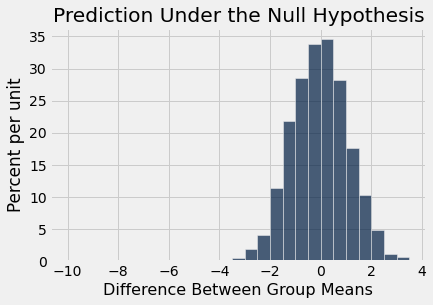

In [31]:
# Run this cell
Table().with_column('Difference Between Group Means', differences).hist(bins=np.arange(-10, 4, 0.5))
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');

## What About Gestational Days?

In [ ]:
# Create an assignment statement called `observed_difference` that
# uses the function `difference_of_means` on the table
# `births`, using the label `Gestational Days`, and the group label
# `Maternal Smoker`
# Create an assignment statement called `differences` that
# is an empty array
# Create a for loop that runs up to 2,500 times
# Within the for loop, there is an assignment statement called
# `new_difference` that is assigned the result of using the function 
# `one_simulated_difference' with the table used being `births`,
# the label used being `Birth Weight`, and the group label used
# being `Maternal Smoker`
# Append to the assignment statement `differences` the results from 
# the assignment statement `new_difference` and assign this to 
# `difference` at the end of the for loop

observed_difference = ...

differences = ...

for ... :
    new_difference = ...
    differences = ...

In [ ]:
# Run this cell 
Table().with_column('Difference Between Group Means', differences).hist(bins=np.arange(-4, 4, 0.5))
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');

In [ ]:
# Here, we are calculating the p-value
# Run this cell
sum(differences <= observed_difference) / 2500
